## Author: Tushar Mehta

## Task 1: Prediction using supervised ML

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


### 1) Importing data from the source

In [2]:
link = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
student_data = pd.read_csv(link)

student_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### 2) Visualizing data

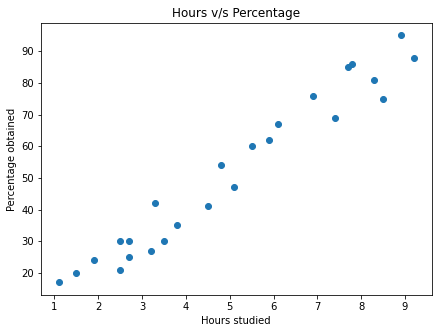

In [3]:
fig,ax = plt.subplots(figsize=(7,5))
ax.scatter(student_data["Hours"],student_data["Scores"])
ax.set(title = "Hours v/s Percentage", xlabel = "Hours studied", ylabel = "Percentage obtained");


The graph indicates that there is a positive linear relationship between number of hours studied and percentage obtained.

## 3) Data Preprocessing

Dividing data into features(i/p) and labels(o/p)

In [4]:
X= student_data.drop("Scores", axis =1).to_numpy()
y = student_data["Scores"].to_numpy()

In [5]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [6]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [7]:
print(X.shape, y.shape)

(25, 1) (25,)


  ## 4) Modelling

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 
model = LinearRegression()  
model.fit(X_train.reshape(-1,1), y_train) 

np.random.seed(42)

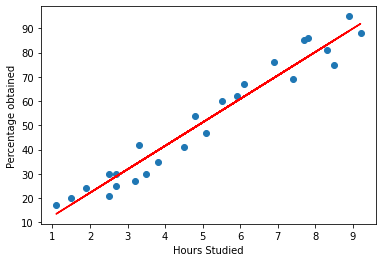

In [10]:
# Plotting the regression line
reg_line = model.coef_*X+model.intercept_


plt.scatter(X, y)
plt.plot(X, reg_line,color='red');
plt.xlabel("Hours Studied")
plt.ylabel("Percentage obtained")
plt.show()

## 5) Predictions 

In [11]:
y_preds = model.predict(X_test)

In [12]:
y_preds

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

## 6) Comparison of actual vs predicted marks

In [13]:
# Comparing Actual vs Predicted
df_comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_preds})

df_comp


,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [14]:
#Estimating training and test score
print("Train Score:", model.score(X_train,y_train))
print("Test Score:", model.score(X_test,y_test))

Train Score: 0.9491209376364416
Test Score: 0.9678055545167994


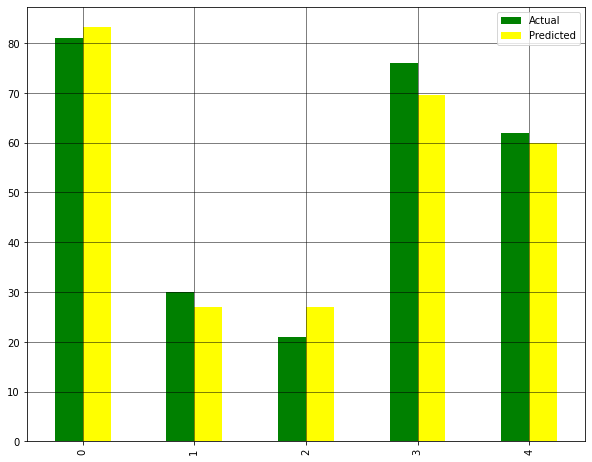

In [15]:
#A plot for comparison

df_comp.plot(kind = "bar", figsize = (10,8), color = ["Green", "Yellow"])
plt.grid(which='major', linewidth='0.5', color='black')
plt.grid(which='minor', linewidth='0.5', color='red')
plt.show()

In [20]:
# Testing the model with our own data

hours = 9.25
test = np.array([hours])
real_pred = model.predict(test.reshape(-1,1))
print(f"No of Hours = {hours}")
print(f"Predicted Percentage = {real_pred[0]} %")


No of Hours = 9.25
Predicted Percentage = 92.38611528261494 %


## 7) Evaluation of model

We will now evaluate the model. With this we will observe how different algorithms perform on the dataset. The errors have been found out to compare the model performance.

In [17]:
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_preds)) 
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_preds))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_preds)))
print('R-2 score:', metrics.r2_score(y_test, y_preds))

Mean Absolute Error(MAE): 3.9207511902099244
Mean Squared Error(MSE): 18.943211722315272
Root Mean Squared Error(RMSE): 4.352380006653288
R-2 score: 0.9678055545167994


The R-2 score is very close to 1 (0.9678055545167994) which is a good score.

## Conclusion 

The task to carry out Prediction using Supervised ML was carried out successfully with the model being evaluated on many parameters.